In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
df = pd.read_csv('Customer_based.csv')

In [59]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [60]:
df.zipcodeOri.unique()

array(["'28007'"], dtype=object)

In [61]:
df.zipMerchant.unique()

array(["'28007'"], dtype=object)

In [62]:
df = df.drop(['zipcodeOri'], axis=1)
df = df.drop(['zipMerchant'], axis=1)

In [63]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [47]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

print(f"Total Number of data values = {len(df_fraud) + len(df_non_fraud)}")
print(f"Number of Fraud transactions = {len(df_fraud)}")

Total Number of data values = 594643
Number of Fraud transactions = 7200


,step,customer,age,gender,merchant,category,amount,fraud
88,0,'C583110837','3','M','M480139044','es_health',44.26,1
89,0,'C1332295774','3','M','M480139044','es_health',324.50,1
434,0,'C1160421902','3','M','M857378720','es_hotelservices',176.32,1
435,0,'C966214713','3','M','M857378720','es_hotelservices',337.41,1
553,0,'C1450140987','4','F','M1198415165','es_wellnessandbeauty',220.11,1


In [43]:
# Finding fraudulent behaviour based on the type of purchase 
pd.concat([df_fraud.groupby('category')['fraud'].size(),
           df_fraud.groupby('category')['amount'].mean(),
           df_non_fraud.groupby('category')['amount'].mean(),
           df_fraud.groupby('category')['fraud'].size()/72],
          keys=['Frequency',"Fraudulent payments","Non-Fraudulent payments","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Percent(%)'],ascending = False)

,Frequency,Fraudulent payments,Non-Fraudulent payments,Percent(%)
category,,,,
'es_sportsandtoys',1982.0,345.366811,88.502738,27.527778
'es_health',1696.0,407.031338,103.737228,23.555556
'es_wellnessandbeauty',718.0,229.422535,57.320219,9.972222
'es_travel',578.0,2660.802872,669.025533,8.027778
'es_hotelservices',548.0,421.823339,106.548545,7.611111
'es_leisure',474.0,300.286878,73.230400,6.583333
'es_home',302.0,457.484834,113.338409,4.194444
'es_hyper',280.0,169.255429,40.037145,3.888889
'es_otherservices',228.0,316.469605,75.685497,3.166667


No handles with labels found to put in legend.


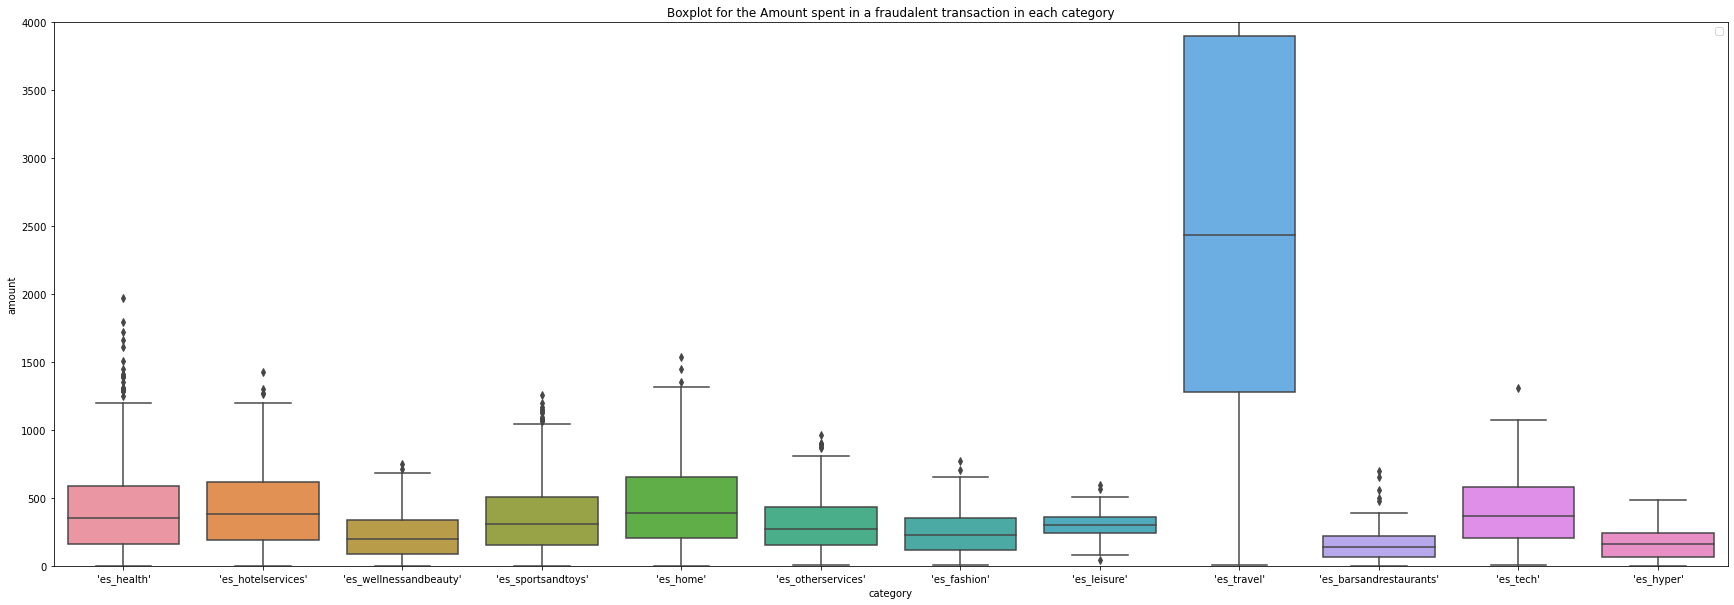

In [49]:
# Plotting histograms for each category
plt.figure(figsize=(30,10))
sns.boxplot(x=df_fraud.category,y=df_fraud.amount)
plt.title("Boxplot for the Amount spent in a fraudalent transaction in each category")
plt.ylim(0,4000)
plt.legend()
plt.show()

In [51]:
(df.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent')

,Age,Fraud Percent
7,'U',0.594228
6,'6',0.974826
5,'5',1.095112
1,'1',1.185254
3,'3',1.192815
2,'2',1.251401
4,'4',1.293281
0,'0',1.957586


Age: Categorized age

    0: <= 18,
    
    1: 19-25,
    
    2: 26-35,
    
    3: 36-45,
    
    4: 46:55,
    
    5: 56:65,
    
    6: > 65
    
    U: Unknown

Gender: Gender for customer

    E : Enterprise,
    
    F: Female,
    
    M: Male,
    
    U: Unknown



In [65]:
# turning object columns type to categorical for easing the transformation process
col_categorical = df.select_dtypes(include= ['object']).columns
for col in col_categorical:
    df[col] = df[col].astype('category')
# categorical values ==> numeric values
df[col_categorical] = df[col_categorical].apply(lambda x: x.cat.codes)
df.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [70]:
X = df.drop(['fraud'],axis = 1)
y = df['fraud']
print("Input(first 5 values) => \n",X.head(),"\n")
print("Target(first 5 values) => \n",y.head())

Input(first 5 values) => 
    step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

Target(first 5 values) => 
 0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [74]:
X_,X_test,y_,y_test = train_test_split(X,y,test_size = 0.15,random_state = 42, shuffle = True)
X_train,X_val,y_train,y_val = train_test_split(X_,y_,test_size = 0.18,random_state = 42, shuffle = True)

print('X_train = ',X_train.shape, "\ty_train = ",y_train.shape,"\n"
      'X_val = ',X_val.shape,"\ty_val = ",y_val.shape,"\n"
      'X_test = ', X_test.shape,"\ty_test = ",y_test.shape)

X_train =  (414465, 7) 	y_train =  (414465,) 
X_val =  (90981, 7) 	y_val =  (90981,) 
X_test =  (89197, 7) 	y_test =  (89197,)


In [76]:
# %% Function for plotting ROC_AUC curve

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88135
           1       0.85      0.61      0.71      1062

    accuracy                           0.99     89197
   macro avg       0.92      0.80      0.85     89197
weighted avg       0.99      0.99      0.99     89197



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

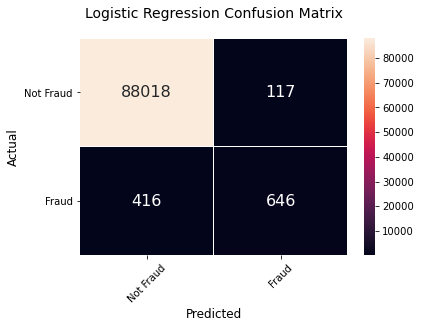

In [89]:
# %% K-nearest Neigbors

knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Fraud', 'Fraud']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

Precision (P) = 88018/(88018+416) = 99.53

Recall (R) = 88018/(88018+117) = 99.87

F1_score = 2*P*R/(P+R) = 99.70

accuracy = (88018+646)/(88018+646+117+416) = 99.40

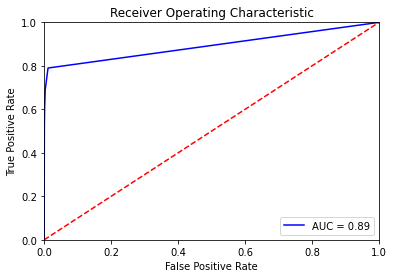

In [90]:
plot_roc_auc(y_test, knn.predict_proba(X_test)[:,1])

Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88135
           1       0.91      0.77      0.84      1062

    accuracy                           1.00     89197
   macro avg       0.95      0.89      0.92     89197
weighted avg       1.00      1.00      1.00     89197



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

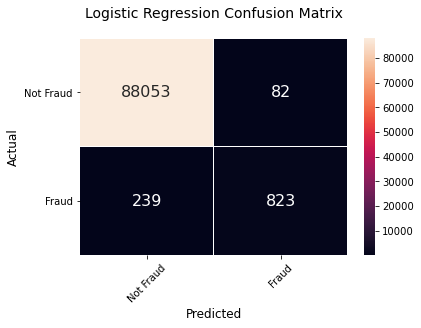

In [88]:
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:hinge", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                base_score=0.5, random_state=42)

XGBoost_CLF.fit(X_train,y_train)

y_pred = XGBoost_CLF.predict(X_test)

print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Fraud', 'Fraud']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

Precision (P) = 88053/(88053+239) = 99.72% 

Recall (R) = 88053/(88053+82) = 99.90% 

F1_score = 2*P*R/(P+R) = 99.81% 

accuracy = (88053+823)/(88053+823+82+239) = 99.64% 

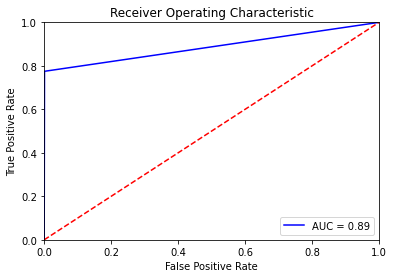

In [93]:
plot_roc_auc(y_test, XGBoost_CLF.predict_proba(X_test)[:,1])

In [ ]:
def verdict(x):
    y_pred = XGBoost_CLF.predict(x)
    if y_pred ==  1 :
        return "Check Fraud"
    else:
        return "Legitimate"